In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
pd.set_option('display.max_columns', None)

2023-05-04 09:26:56.879340: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-04 09:26:56.923578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 09:26:57.726795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# df = pd.read_csv(
#     'predicted_thicknesses/sermeq_aggregated_bootstrap_predictions_parameterization_4.csv'
# )
# df

In [3]:
# np.sqrt(sum(df['Model Variance'])) * sum(df['Area'])

In [4]:
# df1 = gl.load_notebook_data(parameterization = '1') # no threshold
# df2 = gl.load_notebook_data(parameterization = '2') # 0.25 threshold
# df3 = gl.load_notebook_data(parameterization = '3') # 0.50 threshold
df4 = gl.load_notebook_data(parameterization = '4') # 0.75 threshold

glac = gl.load_training_data(RGI_input = 'y')
glac = glac[['RGIId', 'Thickness']]

# df1 = pd.merge(df1, glac, on = 'RGIId', how = 'inner')
# df2 = pd.merge(df2, glac, on = 'RGIId', how = 'inner')
# df3 = pd.merge(df3, glac, on = 'RGIId', how = 'inner')
df4 = pd.merge(df4, glac, on = 'RGIId', how = 'inner')

In [5]:
df4

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,Composite Deviation Uncertainty 3,Weighted Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness
0,RGI60-01.00037,209.310257,216.130905,40.039093,208.571265,-94.797246,0.118873,0.080467,43.391821,2219.381482,7129.436747,266.375041,48.927273,16.951636,26.560076,0.720072,0.000000e+00,28.533295,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0
1,RGI60-01.00570,90.494202,91.317276,15.268613,90.268711,-23.045132,0.007220,0.015211,8.210264,424.174276,1331.136790,266.375041,1.585750,11.444828,13.472248,0.953788,6.639497e-34,16.051460,4025.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0
2,RGI60-01.01104,90.167320,91.284256,15.082670,89.925246,-22.710686,0.007064,0.015024,8.142304,412.393305,1321.486328,266.375041,0.856808,11.012299,13.168570,0.951711,1.637178e-34,16.129356,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0
3,RGI60-01.02236,51.709263,50.033535,13.439234,51.614080,-0.005361,-0.000051,0.012848,2.674014,132.600786,435.588432,266.375041,0.007897,12.636050,12.552254,0.984227,8.469930e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,83.0
4,RGI60-01.02236,51.709263,50.033535,13.439234,51.614080,-0.005361,-0.000051,0.012848,2.674014,132.600786,435.588432,266.375041,0.007897,12.636050,12.552254,0.984227,8.469930e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,107.371895,110.740059,15.851901,107.120721,-33.559400,0.015259,0.013589,11.535520,625.097677,1875.256166,266.375041,0.022817,8.407259,11.557926,0.770130,0.000000e+00,12.710632,4025.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,312.0
496,RGI60-19.01950,97.799950,101.289764,12.548057,97.609065,-27.974227,0.010444,0.007735,9.607995,521.614170,1555.351562,266.375041,0.706690,4.821858,7.778112,0.656968,0.000000e+00,7.245644,4025.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,238.0
497,RGI60-19.02058,79.080803,81.504219,8.664020,78.950951,-15.760741,0.003423,0.003993,6.295792,342.921253,1016.916815,266.375041,0.091583,3.921323,5.671134,0.712962,0.000000e+00,5.367577,4025.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,89.0
498,RGI60-19.02059,91.311539,94.843819,10.899248,91.142168,-23.815412,0.007603,0.005572,8.382532,454.454628,1355.751319,266.375041,0.500644,3.631069,6.074748,0.608096,0.000000e+00,5.354729,4025.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,97.0


# Density plot of E&L vs GlaThiDa mean thickness

In [5]:
# fig, ax = plt.subplots(4,2,figsize = (8,15),
# #                        sharex = True, sharey = True
#                       )

# for n, dataset in enumerate((df1, df2, df3, df4)):
#     data = dataset
#     if n == 0:
#         threshold = 'No Threshold'
#     if n == 1:
#         threshold = '0.25'
#     if n == 2:
#         threshold = '0.50'
#     if n == 3:
#         threshold = '0.75'
# #     axs = plt.subplot(4, 1, n+1)

#     data_1 = data['Mean Thickness']
#     data_2 = data['Farinotti Mean Thickness']
#     data_3 = data['Thickness']


#     # data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
#     # data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

#     print('Sorting data...')
#     x_1 = np.sort(data_1)
#     y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

#     x_2 = np.sort(data_2)
#     y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#     x_3 = np.sort(data_3)
#     y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

#     print('Calculating point density...')
#     # Calculate the point density
#     xy = np.vstack([np.log10(data_1),np.log10(data_3)])

#     z_1 = gaussian_kde(xy)(xy)

#     yz = np.vstack([np.log10(data_2),np.log10(data_3)])

#     z_2 = gaussian_kde(yz)(yz)
    
#     ax[n,0].scatter(
#             data['Thickness'],
#             data['Mean Thickness'],
#             c = z_1,
#             cmap = 'viridis',
#             marker = '.'
#         )
#     ax[n,0].set_xscale('log')
#     ax[n,0].set_yscale('log')
#     ax[n,0].plot(
#         (data['Thickness'].min(), data['Thickness'].max()),
#         (data['Thickness'].min(), data['Thickness'].max()),
#         color = 'red',
#         linestyle = '-'
#     )
    
# #     ax[n,0].set_xlabel('GlaThiDa Survey Thickness (m)')
# #     ax[n,0].set_ylabel('Estimated Thickness (m)')
#     ax[n,0].set_title('This Study Thickness\nSize and Distance Threshold = ' + threshold,
#                      fontsize = 14)
    
#     ax[n,1].scatter(
#             data['Thickness'],
#             data['Farinotti Mean Thickness'],
#             c = z_2,
#             cmap = 'viridis',
#             marker = '.'
#         )
#     ax[n,1].plot(
#         (data['Thickness'].min(), data['Thickness'].max()),
#         (data['Thickness'].min(), data['Thickness'].max()),
#         color = 'red',
#         linestyle = '-'
#     )
#     ax[n,1].set_xscale('log')
#     ax[n,1].set_yscale('log')
#     ax[n,1].set_title('Farinotti et al. Thickness',
#                      fontsize = 14)
#     ax[n,0].tick_params(axis="both", labelsize=14)
#     ax[n,1].tick_params(axis="both", labelsize=14)
# #     ax[n,1].set_xlabel('GlaThiDa Survey Thickness (m)')
# #     ax[n,1].set_ylabel('Farinotti Estimated Thickness (m)')
# #     ax[n,1].set_title('Farinotti et al. 2019')
    
# # plt.suptitle('Comparison of Non-Ice Sheet Glacier Thickness Estimates', y = 0.99)
# fig.supylabel('Estimated Thickness (m)', fontsize = 18)
# fig.supxlabel('GlaThiDa Survey Thickness (m)', fontsize = 18)

# plt.tight_layout()

In [6]:
df4

,RGIId,Mean Thickness,Median Thickness,Thickness Std Dev,Weighted Mean Thickness,Residual Correction,Residual Variance,Bootstrap Uncertainty,Composite Deviation Uncertainty,MAE Uncertainty,Weighted Volume (km3),Lower Bound,Upper Bound,Shapiro-Wilk statistic,Shapiro-Wilk p_value,IQR,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness
0,RGI60-01.00037,209.310257,216.130905,40.039093,208.571265,-94.797246,0.118873,0.080467,0.521201,266.375041,48.927273,16.951636,26.560076,0.720072,0.000000e+00,28.533295,4025.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0
1,RGI60-01.00570,90.494202,91.317276,15.268613,90.268711,-23.045132,0.007220,0.015211,0.226180,266.375041,1.585750,11.444828,13.472248,0.953788,6.637803e-34,16.051460,4025.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0
2,RGI60-01.01104,90.167320,91.284256,15.082670,89.925246,-22.710686,0.007064,0.015024,0.225284,266.375041,0.856808,11.012299,13.168570,0.951711,1.636929e-34,16.129356,4025.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0
3,RGI60-01.02236,51.709263,50.033535,13.439234,51.614080,-0.005361,-0.000051,0.012848,0.129126,266.375041,0.007897,12.636050,12.552254,0.984228,8.481462e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,83.0
4,RGI60-01.02236,51.709263,50.033535,13.439234,51.614080,-0.005361,-0.000051,0.012848,0.129126,266.375041,0.007897,12.636050,12.552254,0.984228,8.481462e-21,16.174629,4025.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,107.371895,110.740059,15.851901,107.120721,-33.559400,0.015259,0.013589,0.268218,266.375041,0.022817,8.407259,11.557926,0.770131,0.000000e+00,12.710632,4025.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,312.0
496,RGI60-19.01950,97.799950,101.289764,12.548057,97.609065,-27.974227,0.010444,0.007735,0.244603,266.375041,0.706690,4.821858,7.778112,0.656968,0.000000e+00,7.245644,4025.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,238.0
497,RGI60-19.02058,79.080803,81.504219,8.664020,78.950951,-15.760741,0.003423,0.003993,0.197921,266.375041,0.091583,3.921323,5.671134,0.712960,0.000000e+00,5.367577,4025.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,89.0
498,RGI60-19.02059,91.311539,94.843819,10.899248,91.142168,-23.815412,0.007603,0.005572,0.228436,266.375041,0.500644,3.631069,6.074748,0.608096,0.000000e+00,5.354729,4025.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,97.0


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          1.,   1.,   0.,   1.,   3.,   2.,   0.,   0.,   0.,   0.,   1.,
          4.,   2.,   1.,   2.,   2.,   4.,   4.,   7.,   6.,  12.,   8.,
         15.,  24.,  48.,  88., 110.,  64.,  41.,  27.,  11.,   1.,   1.,
          2.,   1.,   1.,   0.,   0.,   1.]),
 array([-3.61200607e+02, -3.51435587e+02, -3.41670568e+02, -3.31905548e+02,
        -3.22140528e+02, -3.12375508e+02, -3.02610488e+02, -2.92845468e+02,
        -2.83080449e+02, -2.73315429e+02, -2.63550409e+02, -2.53785389e+02,
        -2.44020369e+02, -2.34255349e+02, -2.24490330e+02, -2.14725310e+02,
        -2.04960290e+02, -1.95195270e+02, -1.85430250e+02, -1.75665230e+02,
        -1.65900211e+02, -1.56135191e+02, -1.46370171e+02, -1.36605151e+02,
        -1.26840131e+02, -1.17075111e+02, -1.07310092e+02, -9.75450717e+01,
        -8.77800519e+01, -7.80150320e+01, -6.82500122e+01, -5.84849924e+01,
        -4.87199725e+01, -3.89549527e+01, -2.91899

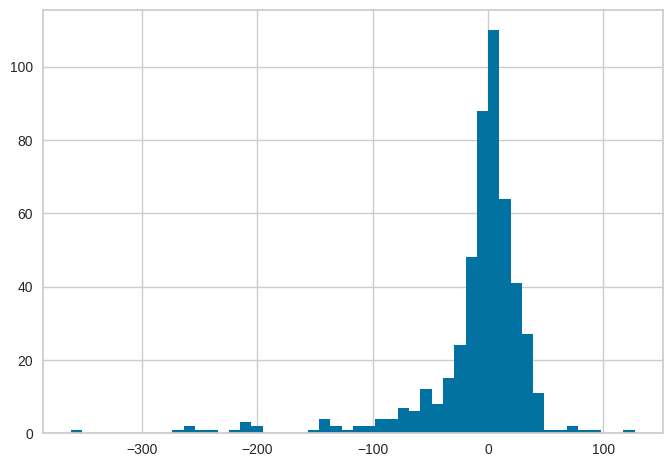

In [10]:
plt.hist(df4['Mean Thickness'] - df4['Thickness'], 50)